# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&APPID={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    # print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(f'Processing Record {record_count} of Set {set_count} | {city}')

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | high rock
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | gat
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | kahului
Processing Record 8 of Set 1 | aklavik
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | yumen
Processing Record 11 of Set 1 | port-gentil
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | santa rosa
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | oranjestad
Processing Record 20 of Set 1 | mullaitivu
City not found. Skipping...
Processing Record 21 of Set 1 | horadiz


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,28.09,83,75,2.06,TO,1675740652
1,high rock,26.6208,-78.2833,18.01,65,8,5.69,BS,1675740987
2,cidreira,-30.1811,-50.2056,22.81,78,0,4.15,BR,1675740906
3,gat,31.6100,34.7642,10.38,100,100,10.94,IL,1675740989
4,kruisfontein,-34.0033,24.7314,21.05,96,36,4.08,ZA,1675740758


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [5]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")


# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,28.09,83,75,2.06,TO,1675740652
1,high rock,26.6208,-78.2833,18.01,65,8,5.69,BS,1675740987
2,cidreira,-30.1811,-50.2056,22.81,78,0,4.15,BR,1675740906
3,gat,31.6100,34.7642,10.38,100,100,10.94,IL,1675740989
4,kruisfontein,-34.0033,24.7314,21.05,96,36,4.08,ZA,1675740758


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

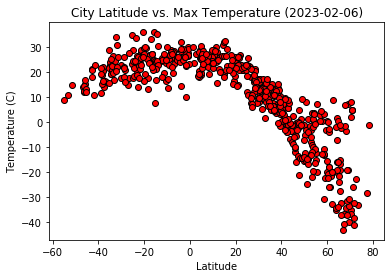

In [10]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
plt.scatter(latitude, temperature, marker="o", facecolors="red", edgecolors="black")


# Incorporate the other graph properties (title, axis titles, etc)
plt.title("City Latitude vs. Max Temperature (2023-02-06)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

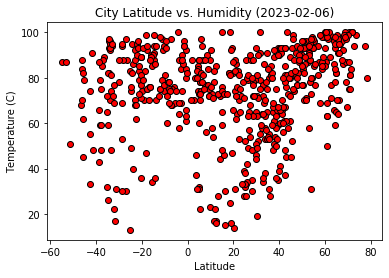

In [11]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black")


# Incorporate the other graph properties (title, axis titles, etc)
plt.title("City Latitude vs. Humidity (2023-02-06)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

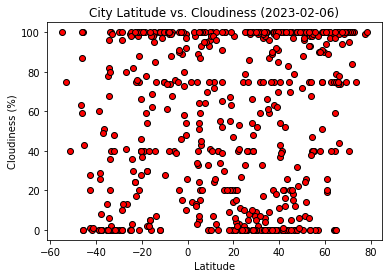

In [13]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, marker="o", facecolors="red", edgecolors="black")


# Incorporate the other graph properties (title, axis titles, etc)
plt.title("City Latitude vs. Cloudiness (2023-02-06)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

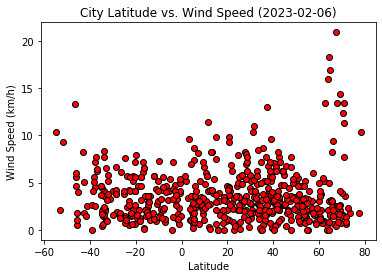

In [14]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, marker="o", facecolors="red", edgecolors="black")


# Incorporate the other graph properties (title, axis titles, etc)
plt.title("City Latitude vs. Wind Speed (2023-02-06)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_gres_plot(x_values,y_values,y_label,coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coord,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue}")
    if coord[0]>0:
        print(f'In the northern hemisphere sample data, {round((rvalue**2)*100,1)}% of the {y_label} datapoints can be explained by the degrees of Latitude.')
    else:
        print(f'In the southern hemisphere sample data, {round((rvalue**2)*100,1)}% of the {y_label} datapoints can be explained by the degrees of Latitude.')

    plt.show()

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,high rock,26.6208,-78.2833,18.01,65,8,5.69,BS,1675740987
3,gat,31.6100,34.7642,10.38,100,100,10.94,IL,1675740989
5,kahului,20.8947,-156.4700,26.01,74,20,9.77,US,1675740822
6,aklavik,68.2191,-135.0107,-34.40,97,100,1.30,CA,1675740756
7,yumen,40.2833,97.2000,-0.24,41,37,7.06,CN,1675740992


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vaini,-21.2000,-175.2000,28.09,83,75,2.06,TO,1675740652
2,cidreira,-30.1811,-50.2056,22.81,78,0,4.15,BR,1675740906
4,kruisfontein,-34.0033,24.7314,21.05,96,36,4.08,ZA,1675740758
8,port-gentil,-0.7193,8.7815,26.87,80,48,3.90,GA,1675740993
9,rikitea,-23.1203,-134.9692,26.49,70,24,4.17,PF,1675740757


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8758757379062665
In the northern hemisphere sample data, 76.7% of the Max Temp (C) datapoints can be explained by the degrees of Latitude.


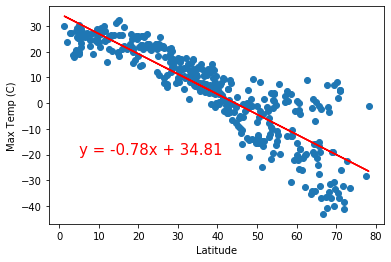

In [13]:
# Linear regression on Northern Hemisphere
lin_gres_plot(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],'Max Temp (C)',(5,-20))

The r-value is: 0.4805181484335863
In the southern hemisphere sample data, 23.1% of the Max Temp (C) datapoints can be explained by the degrees of Latitude.


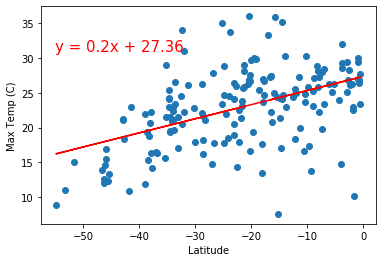

In [14]:
# Linear regression on Southern Hemisphere
lin_gres_plot(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Max Temp (C)',(-55,31))

**Discussion about the linear relationship:** 

With regard to the linear relationship between degrees Latitude and Max Temp. in degrees Celsius, both hemispheres exhibit a similar correlation in that Max Temp does appear to increase as one nears the equator (0 degrees latitude). An important note here is that the correlations exhibited in the northern and southern hemispheres, although they appear to be opposite in nature (negative value in north and positive value in the south), they both represent a decrease in temperatures away from latitude 0. This correlation appears to be stronger in the northern hemisphere (with a correlation coefficient, r, of -0.88 - a high negative correlation) than in the southern hemisphere (r = 0.48 - a moderate correlation). 

This disparity in degree of correlation can likely be explained by a number of factors:

- Primarily, the moderating influence of oceans is more prevalent in the southern hemisphere. 
    - This is largely the result of the fact that the southern hemisphere is home to less than a third of Earth's land mass by area. By contrast, the northern hemisphere is home to more than two thirds of Earth's land mass which causes seasonal and diurnal temperatures to be more closely related to sunlight receipt.
    
    This effect can also be seen in the range of temperatures: in the northern hemisphere, a range of more than 70 degrees celsius between the northern-most city to the equatorial cities was observed. In the southern hemisphere, a range of only 40-45 degrees celsius is observed - though this is also related to the fact that no southern hemispherical cities in the sample were located south of 58 degrees south.

- This effect is also amplified by the fact that the data was measured in February, which where most northern hemisphere cities experience winter and with it an increasingly low receipt of sunlight.

It is also worth noting that there are a disparate proportion of sample cities in each hemisphere. 395 of the 586 (~67%) sample cities are located in the northern hemisphere. This is important as standard error in the calculation of r-squared would be reduced for the southern hemisphere regression had there been more cities in the southern hemisphere sample.



### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4063213625088079
In the northern hemisphere sample data, 16.5% of the Humidity (%) datapoints can be explained by the degrees of Latitude.


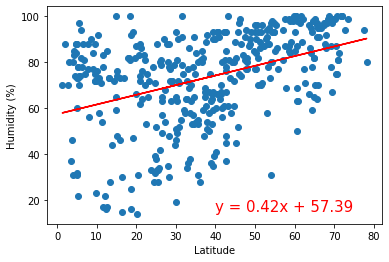

In [15]:
# Northern Hemisphere
lin_gres_plot(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Humidity (%)',(40,15))


The r-value is: 0.19881167300699734
In the southern hemisphere sample data, 4.0% of the Humidity (%) datapoints can be explained by the degrees of Latitude.


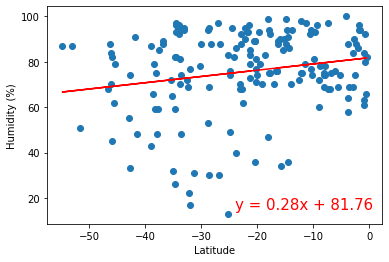

In [16]:
# Southern Hemisphere
lin_gres_plot(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],'Humidity (%)',(-24,15))

**Discussion about the linear relationship:** 
Although both northern and southern hemisphere regressions suggest a correlation between latitude and humidity, the correlation shown in the southern sample is very weak (r = 0.2) and the r-squared of less than 0.05 shows that only about 4% of the proportion of variance in humidity is explained by latitude.

The northern sample data suggests a slightly stronger correlation (r = 0.4), but with an r-squared value of 16.5% this correlation is also not very reliable. 

In other words, one could not confidently predict the humidity percentage based purely off of the linear regression calculated for either sample data.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.27352305912579067
In the northern hemisphere sample data, 7.5% of the Cloudiness (%) datapoints can be explained by the degrees of Latitude.


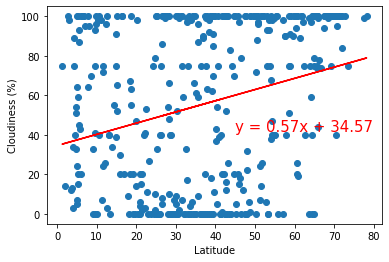

In [78]:
# Northern Hemisphere
lin_gres_plot(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],'Cloudiness (%)',(45,42))

The r-value is: 0.3397339899758615
In the southern hemisphere sample data, 11.5% of the Cloudiness (%) datapoints can be explained by the degrees of Latitude.


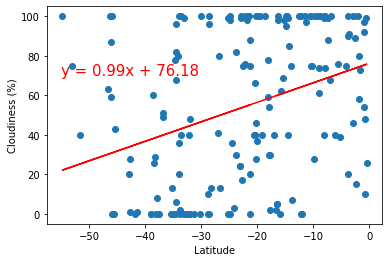

In [79]:
# Southern Hemisphere
lin_gres_plot(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],'Cloudiness (%)',(-55,70))

**Discussion about the linear relationship:** 

The linear relationships suggested above for Cloudiness (%) versus Latitude, with r-values of 0.27 and 0.34 (for the northern and southern hemispheres, respectively), are both considered weak correlations. The r-squared values also suggest that very little (7.5 to 11.5%) of the variance observed in Cloudiness percentage is explained by latitude (r-squared = 0.075 and 0.115 for the northern and southern hemispheres, respectively).



### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03543902467214045
In the northern hemisphere sample data, 0.1% of the Wind Speed (kph) datapoints can be explained by the degrees of Latitude.


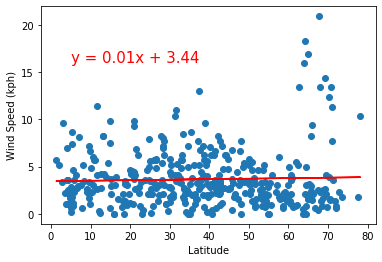

In [82]:
# Northern Hemisphere
lin_gres_plot(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],'Wind Speed (kph)',(5,16))

The r-value is: -0.19920652287042176
In the southern hemisphere sample data, 4.0% of the Wind Speed (kph) datapoints can be explained by the degrees of Latitude.


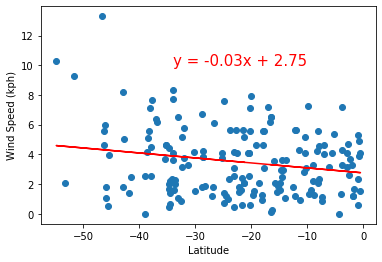

In [81]:
# Southern Hemisphere
lin_gres_plot(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],'Wind Speed (kph)',(-34,10))

**Discussion about the linear relationship:**
Though the southern hemisphere data suggests a weak correlation (r = -0.2), the northern and southern hemisphere data show that very little of the observed wind speed data in the overall sample is explained by latitude (r-squared = 0.001 and 0.04, respectively).